<a href="https://colab.research.google.com/github/ggrkggrk/Jupytor-Notebook/blob/main/ML_AI_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning with ChatGPT: Image Classification Model**

**Project Goal**



*   Use ChatGPT to generate Machine Learning Code with the open source library Keras using prompts.



*   # Build a Neural Network with MNIST Using Keras
*   # Substitute Loss Function
*   # Substitute Fully Connected Layer with Convolutional Layer
*   # Evaluate model performance & accuracy and create validation set to keep track of overfitting.
*   # Plot Losses using Matplotlib and random images to check accuracy visually



***prompt***:



1.   *Write Python code of a neural network to solve the MNIST problem using Keras using fully connected layers and categoricalcrossentropy as the loss function without evaluating the model on the test set*


2.   *Change the loss function to be sparse categorial crossentropy*
3.    *Use convolutional Layers*
4.    *Evaluate the model using its test set Use 20% of the training set as a validation set*
5.    *plot the training and test loss using matplotlib plot 20 random images with label from the training set and see if the model predicts the images correct by color coding wrong predictions with red and right predictions with green*
6.   *Add a confusion matrix*







Epoch 1/10
1500/1500 [==============================] - 70s 45ms/step - loss: 0.1466 - accuracy: 0.9552 - val_loss: 0.0660 - val_accuracy: 0.9806
Epoch 2/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 3/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0430 - val_accuracy: 0.9878
Epoch 4/10
1500/1500 [==============================] - 56s 38ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0400 - val_accuracy: 0.9885
Epoch 5/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0381 - val_accuracy: 0.9887
Epoch 6/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0436 - val_accuracy: 0.9900
Epoch 7/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0504 -

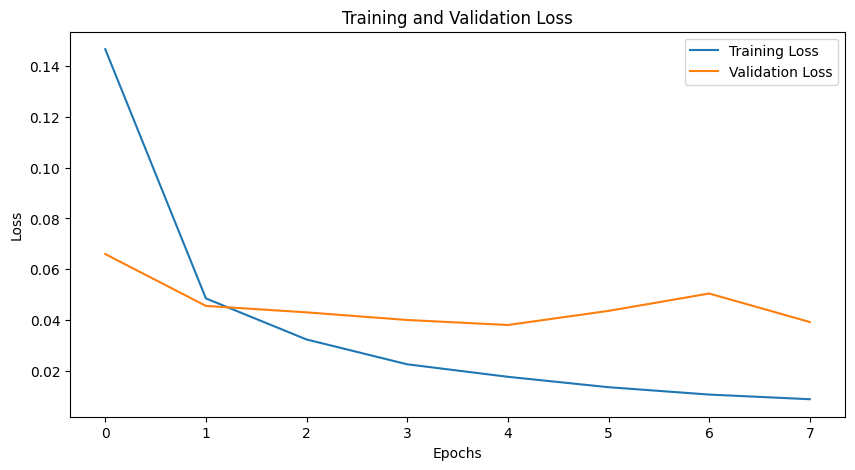

1/1 [==============================] - 0s 32ms/step


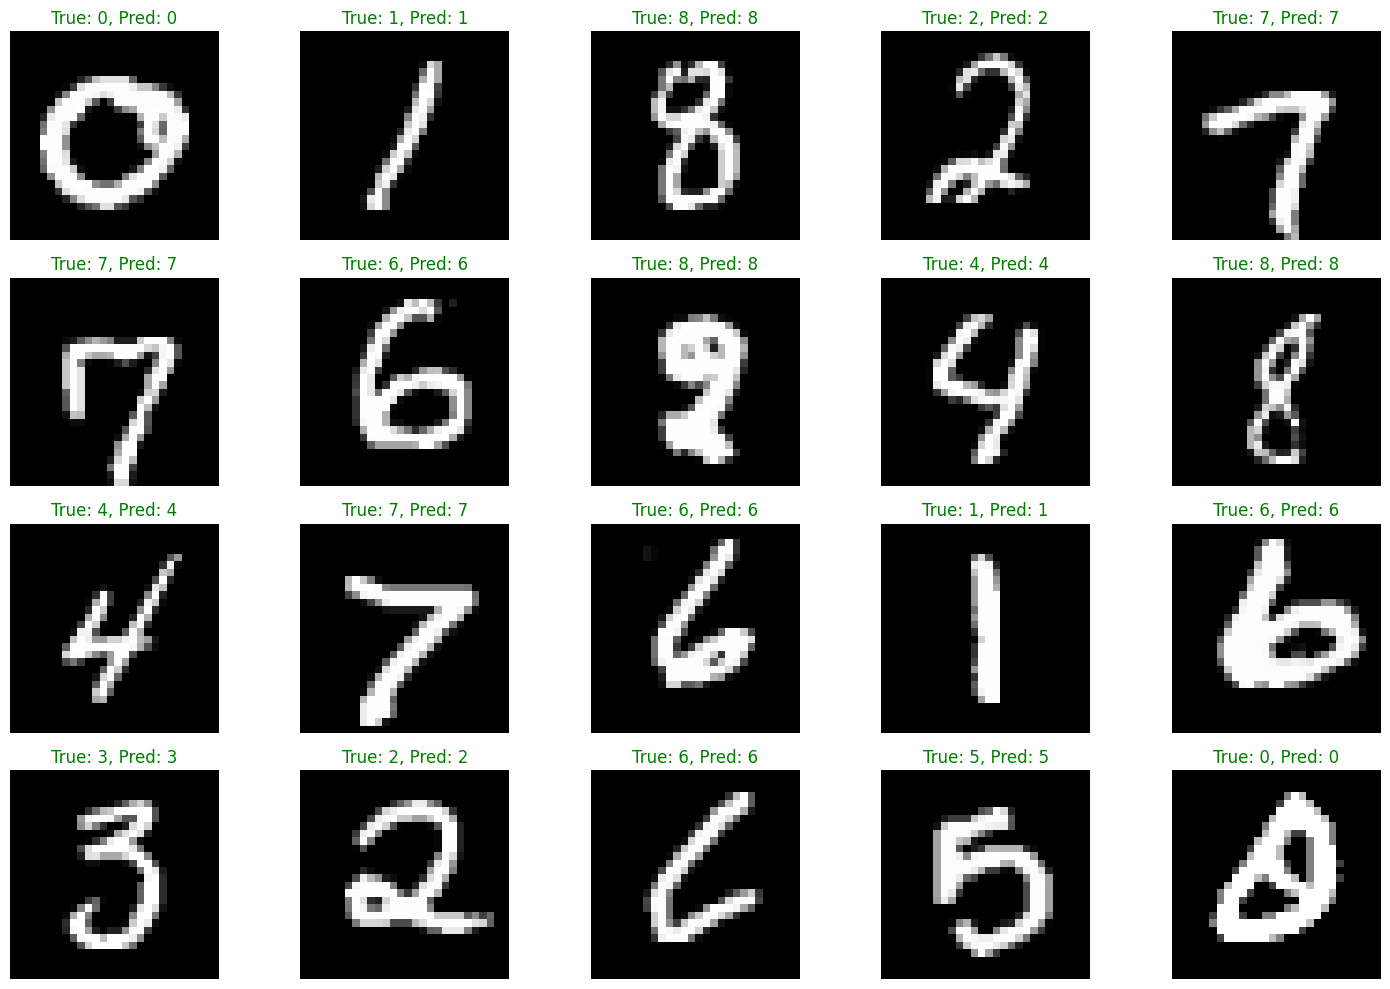

313/313 [==============================] - 3s 11ms/step


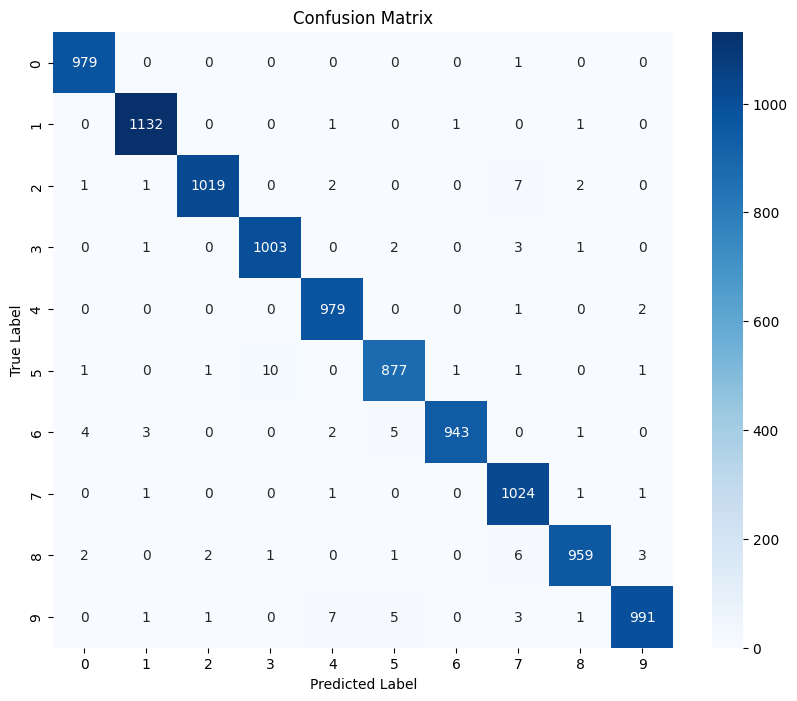

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension (1 channel for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Create the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer with 32 filters and a 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer with a 2x2 pool size
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Second convolutional layer with 64 filters and a 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer with a 2x2 pool size
    Flatten(),  # Flatten the output to feed into fully connected layers
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (one per class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with 20% of the training set as validation set
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot 20 random images from the training set with color-coded predictions
plt.figure(figsize=(15, 10))
indices = np.random.choice(np.arange(len(x_train)), 20, replace=False)
for i, idx in enumerate(indices):
    img = x_train[idx]
    true_label = y_train[idx]
    img_reshaped = img.reshape(1, 28, 28, 1)
    prediction = np.argmax(model.predict(img_reshaped))
    color = 'green' if prediction == true_label else 'red'

    plt.subplot(4, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {prediction}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Compute predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
